In [1]:
import pandas as pd

In [2]:
blood_transfusion = pd.read_csv('data/blood_transfusion.csv')
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

In [3]:
data.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [4]:
target.head()

0        donated
1        donated
2        donated
3        donated
4    not donated
Name: Class, dtype: object

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [6]:
model = make_pipeline(StandardScaler(), SVC())

In [7]:
from sklearn.model_selection import cross_validate, ShuffleSplit

In [8]:
cv = ShuffleSplit(random_state=0)
cv_results = cross_validate(model, data, target, cv=cv, n_jobs=2)
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score
0,0.066178,0.005904,0.680000
1,0.065155,0.005935,0.746667
2,0.026914,0.005984,0.786667
3,0.026917,0.005982,0.800000
4,0.022698,0.004983,0.746667
5,0.021700,0.004983,0.786667
6,0.021898,0.003997,0.800000
7,0.020899,0.004986,0.826667
8,0.018466,0.003981,0.746667
9,0.018451,0.003994,0.733333


In [9]:
print(f"Accuracy score of our model:\n"
      f"{cv_results['test_score'].mean():.3f} +/- "
      f"{cv_results['test_score'].std():.3f}")

Accuracy score of our model:
0.765 +/- 0.043


In [10]:
import numpy as np
from sklearn.model_selection import validation_curve

In [13]:
gammas = np.logspace(-3, 2, num=30)
param_name = "svc__gamma"
train_scores, test_scores = validation_curve(
    model, data, target, param_name=param_name, param_range=gammas, cv=cv,
    n_jobs=2)

In [14]:
import matplotlib.pyplot as plt

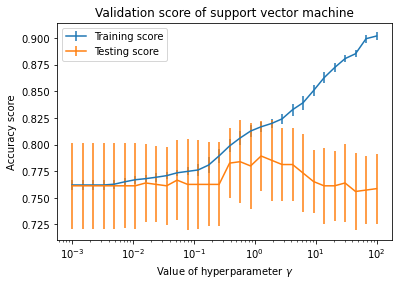

In [16]:
plt.errorbar(gammas, train_scores.mean(axis=1),
             yerr=train_scores.std(axis=1), label='Training score')
plt.errorbar(gammas, test_scores.mean(axis=1),
             yerr=test_scores.std(axis=1), label='Testing score')
plt.legend()

plt.xscale("log")
plt.xlabel(r"Value of hyperparameter $\gamma$")
plt.ylabel("Accuracy score")
_ = plt.title("Validation score of support vector machine")

Looking at the curve, we can clearly identify the over-fitting regime of the SVC classifier when gamma > 1. The best setting is around gamma = 1 while for gamma < 1, it is not very clear if the classifier is under-fitting but the testing score is worse than for gamma = 1.

In [17]:
from sklearn.model_selection import learning_curve

In [18]:
train_sizes = np.linspace(0.1, 1, num=10)
results = learning_curve(
    model, data, target, train_sizes=train_sizes, cv=cv, n_jobs=2)
train_size, train_scores, test_scores = results[:3]

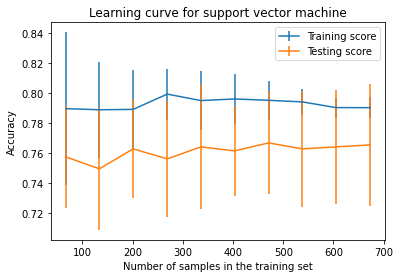

In [19]:
plt.errorbar(train_size, train_scores.mean(axis=1),
             yerr=train_scores.std(axis=1), label='Training score')
plt.errorbar(train_size, test_scores.mean(axis=1),
             yerr=test_scores.std(axis=1), label='Testing score')
plt.legend()

plt.xlabel("Number of samples in the training set")
plt.ylabel("Accuracy")
_ = plt.title("Learning curve for support vector machine")

We observe that adding new samples in the dataset does not improve the testing score. We can only conclude that the standard deviation of the training error is decreasing when adding more samples which is not a surprise.